# Moran's I Figure

In [1]:
import scanpy as sc
import cellbin_moran as cm
import squidpy as sq
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed

# Scanpy Settings
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         9.2.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
brotli                      1.1.0
cellbin_moran               NA
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dask                        2024.4.2
dask_expr                   1.0.13
dask_image                  2023.08.1
datashader                  0.16.1
datatree                    0.0.14
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
dill                       

In [2]:
dir_path = "/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp"

In [48]:
cellpaths = cm.list_files_matching_criteria(dir_path, "01", separator = ".")

In [49]:
cellpaths

{'HZ12M01_Basal forebrain': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Basal forebrain.h5ad',
 'HZ12M01_Hippocampal formation': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Hippocampal formation.h5ad',
 'HZ12M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Prefrontal cortex.h5ad',
 'HZ12M01_Striatum': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Striatum.h5ad',
 'HZ2M01_Basal forebrain': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Basal forebrain.h5ad',
 'HZ2M01_Hippocampal formation': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Hippocampal formation.h5ad',
 'HZ2M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Prefrontal cortex.h5ad',
 'HZ2M01_Striatum': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bi

In [104]:
cellbins = cm.load_data_in_parallel(cellpaths, sc.read_h5ad)

In [51]:
cellbins

{'HZ12M01_Basal forebrain': AnnData object with n_obs × n_vars = 9356 × 873
     obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'p

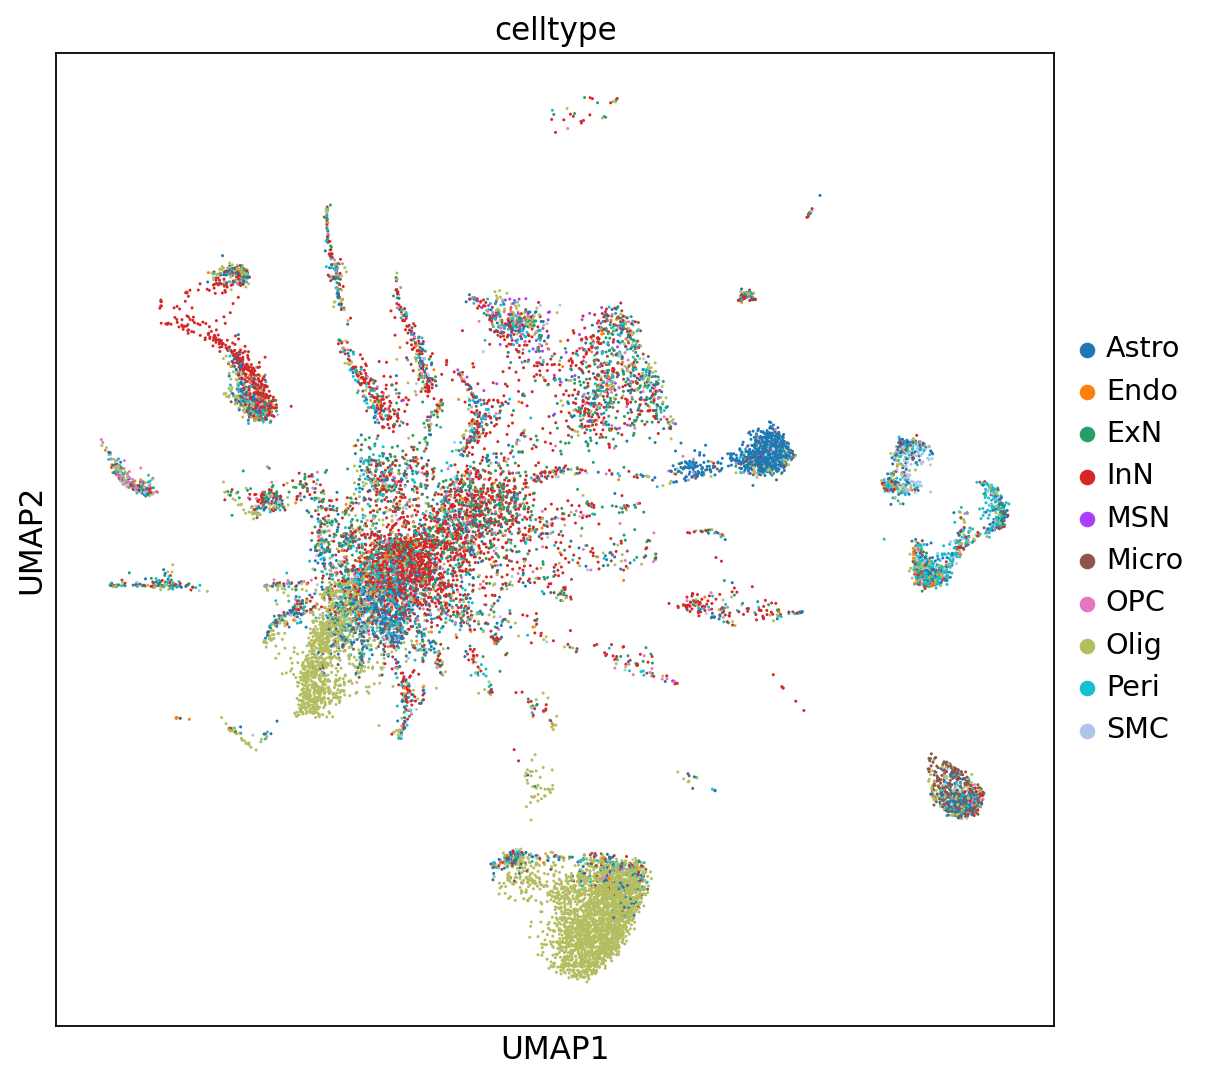

In [55]:
sc.pl.umap(cellbins["HZ4MP101_Basal forebrain"], color = "celltype")

In [20]:
adata.obs["celltype"].unique()

['InN', 'Olig', 'MSN', 'ExN', 'Micro', 'Astro', 'Peri', 'Endo', 'OPC', 'SMC']
Categories (10, object): ['Astro', 'Endo', 'ExN', 'InN', ..., 'OPC', 'Olig', 'Peri', 'SMC']

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: min_center_dist, dtype: float64

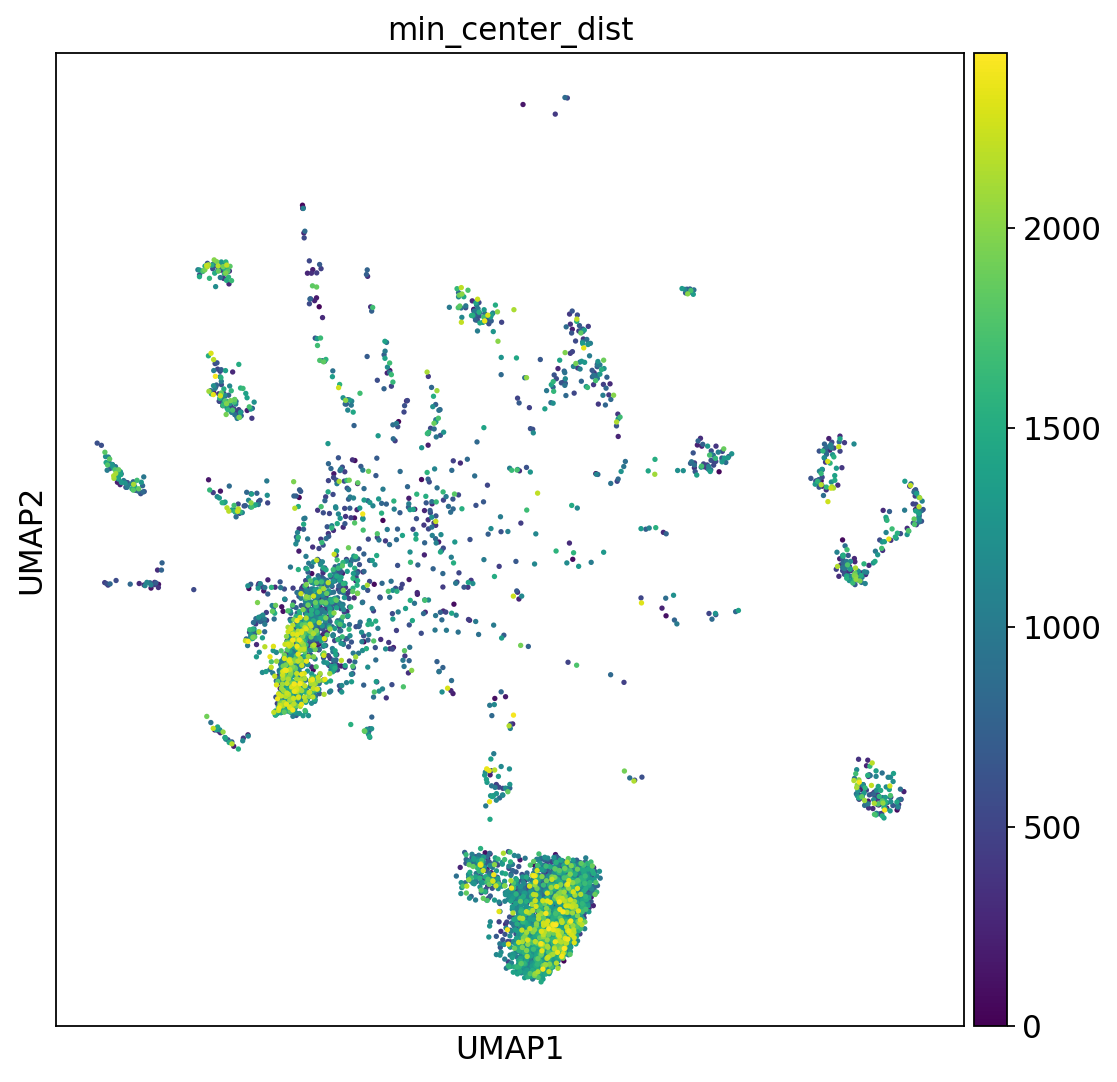

In [57]:
adata = cellbins["HZ4MP101_Basal forebrain"].copy()
mask = adata.obs["celltype"] == "Olig"
sc.pl.umap(adata[mask], color=["min_center_dist"])


In [46]:
adata.obs["min_center_dist"].describe()

count    51608.000000
mean       576.847761
std        347.987350
min          0.000000
25%        308.602495
50%        536.783681
75%        786.765774
max       1809.987722
Name: min_center_dist, dtype: float64

# True Figure

In [107]:
slide = {}
for key, adata in cellbins.items():
    if "Prefrontal cortex" in key:
        print(key)
        slide[key] = adata.copy()

HZ12M01_Prefrontal cortex
HZ2M01_Prefrontal cortex
HZ3M01_Prefrontal cortex
HZ4MP101_Prefrontal cortex
HZ5M01_Prefrontal cortex
HZ6MP101_Prefrontal cortex
HZ8M01_Prefrontal cortex


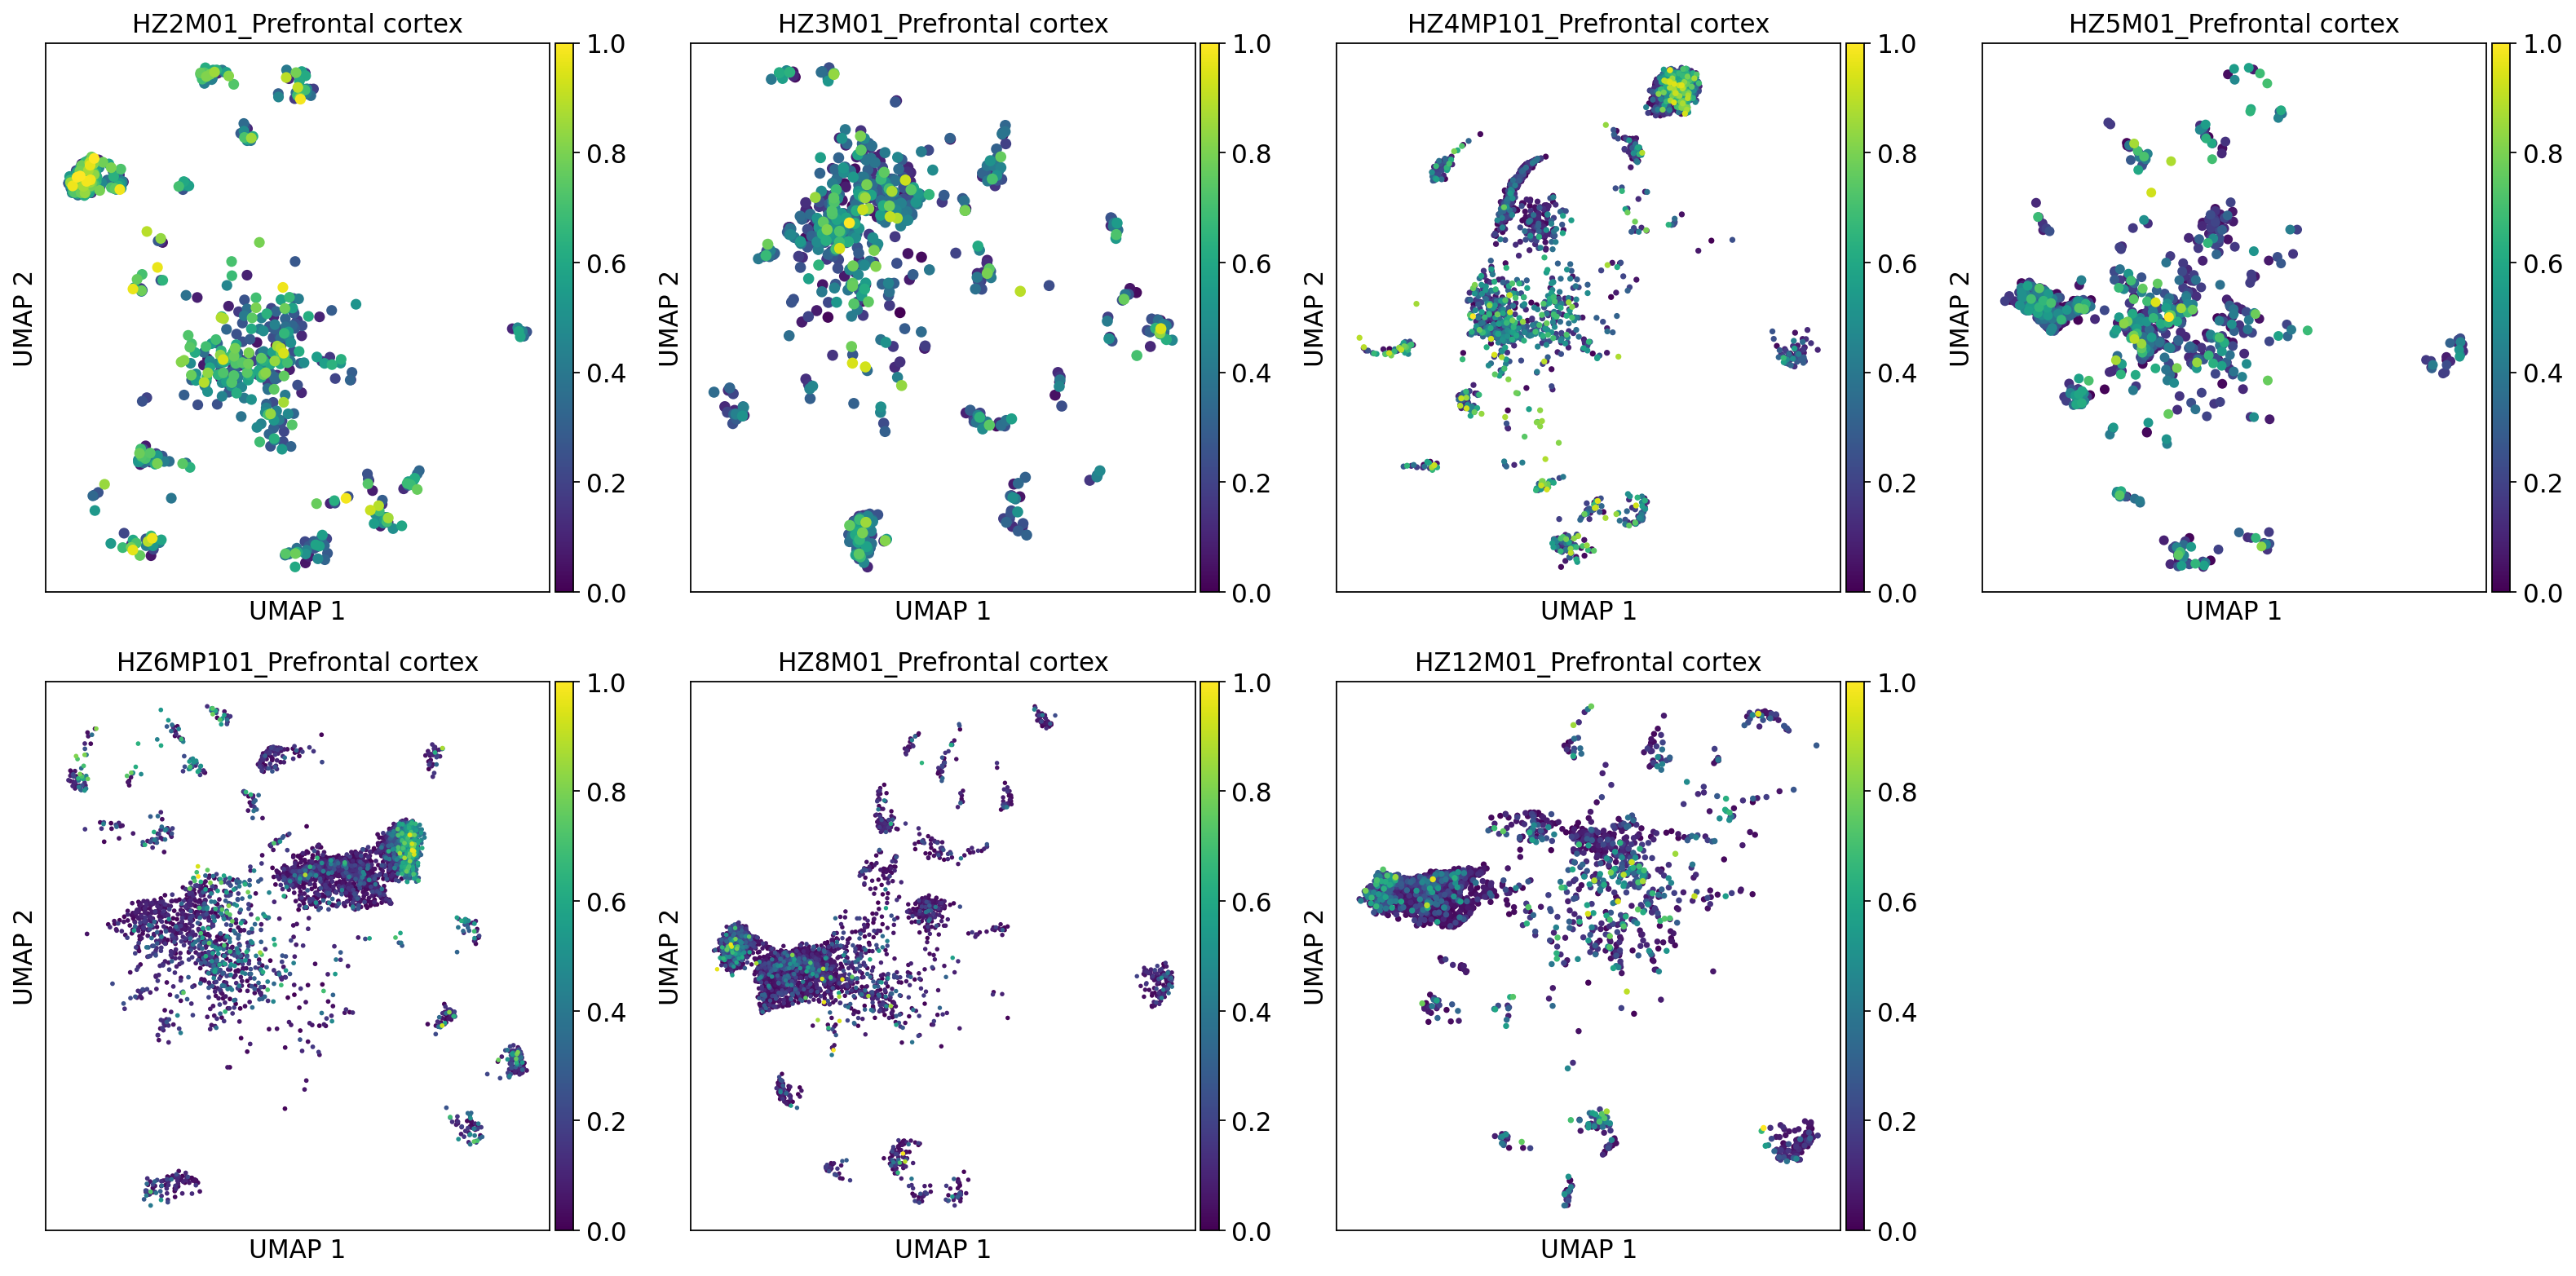

In [110]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

# Determine the number of subplots needed
num_plots = len(slide)
num_rows = 2
num_cols = 4

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2x3 array to easily iterate through it

# Function to normalize values between 0 and 1
def normalize(values):
    min_val = values.min()
    max_val = values.max()
    return (values - min_val) / (max_val - min_val)

# Rearrange the slide items to start with the second key and put the first key last
slide_items = list(slide.items())
slide_items = slide_items[1:] + slide_items[:1]

# Plot each adata in the appropriate subplot
for i, (key, adata) in enumerate(slide_items):
    mask = adata.obs["celltype"] == "Micro"
    # Normalize the min_center_dist values for this adata object
    adata.obs.loc[mask, "min_center_dist_normalized"] = normalize(adata.obs.loc[mask, "min_center_dist"])
    # Plot the normalized values
    sc.pl.umap(adata[mask], color="min_center_dist_normalized", vmin=0, vmax=1, ax=axes[i], show=False)
    axes[i].set_title(key)
    axes[i].set_xlabel("UMAP 1")
    axes[i].set_ylabel("UMAP 2")

# Hide any unused subplots if there are fewer than 6 plots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipykernel_253085/303944366.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the color bar


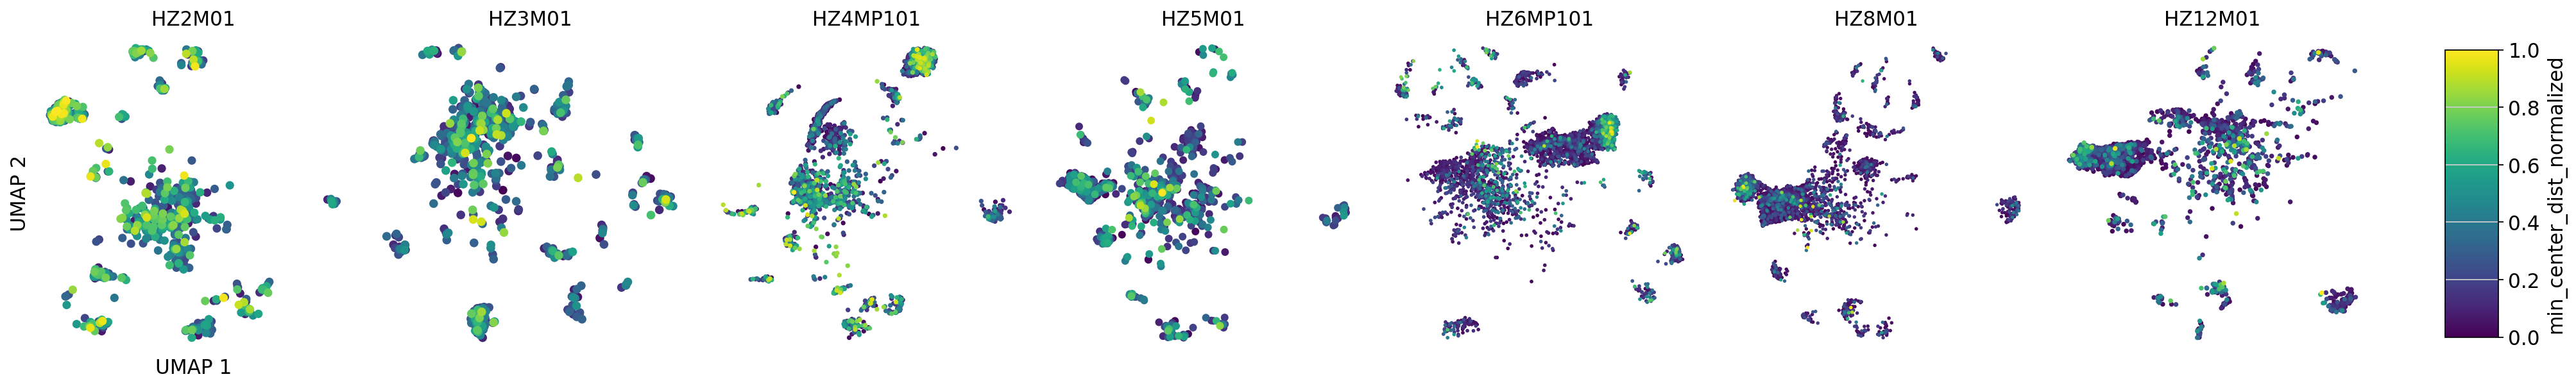

In [144]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

# Determine the number of subplots needed
num_plots = len(slide)
num_rows = 1
num_cols = 7

# Create a 1x7 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(26, 4), gridspec_kw={'width_ratios': [1] * num_cols})
axes = axes.flatten()  # Flatten the 1x7 array to easily iterate through it

# Function to normalize values between 0 and 1
def normalize(values):
    min_val = values.min()
    max_val = values.max()
    return (values - min_val) / (max_val - min_val)

# Rearrange the slide items to start with the second key and put the first key last
slide_items = list(slide.items())
slide_items = slide_items[1:] + slide_items[:1]

# Plot each adata in the appropriate subplot
for i, (key, adata) in enumerate(slide_items):
    mask = adata.obs["celltype"] == "Micro"
    # Normalize the min_center_dist values for this adata object
    adata.obs.loc[mask, "min_center_dist_normalized"] = normalize(adata.obs.loc[mask, "min_center_dist"])
    # Plot the normalized values
    sc.pl.umap(adata[mask], color="min_center_dist_normalized", vmin=0, vmax=1, ax=axes[i], show=False, colorbar_loc = None)
    axes[i].set_title(key.split(sep = "_")[0])
    for pos in ['right', 'top', 'bottom', 'left']: 
        axes[i].spines[pos].set_visible(False)
    
    # Only set the x and y labels for the lower-left corner plot
    if i == 0:
        axes[i].set_xlabel("UMAP 1")
        axes[i].set_ylabel("UMAP 2")
    else:
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")


# Add an axis for the color bar on the right border
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('min_center_dist_normalized')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the color bar
plt.show()


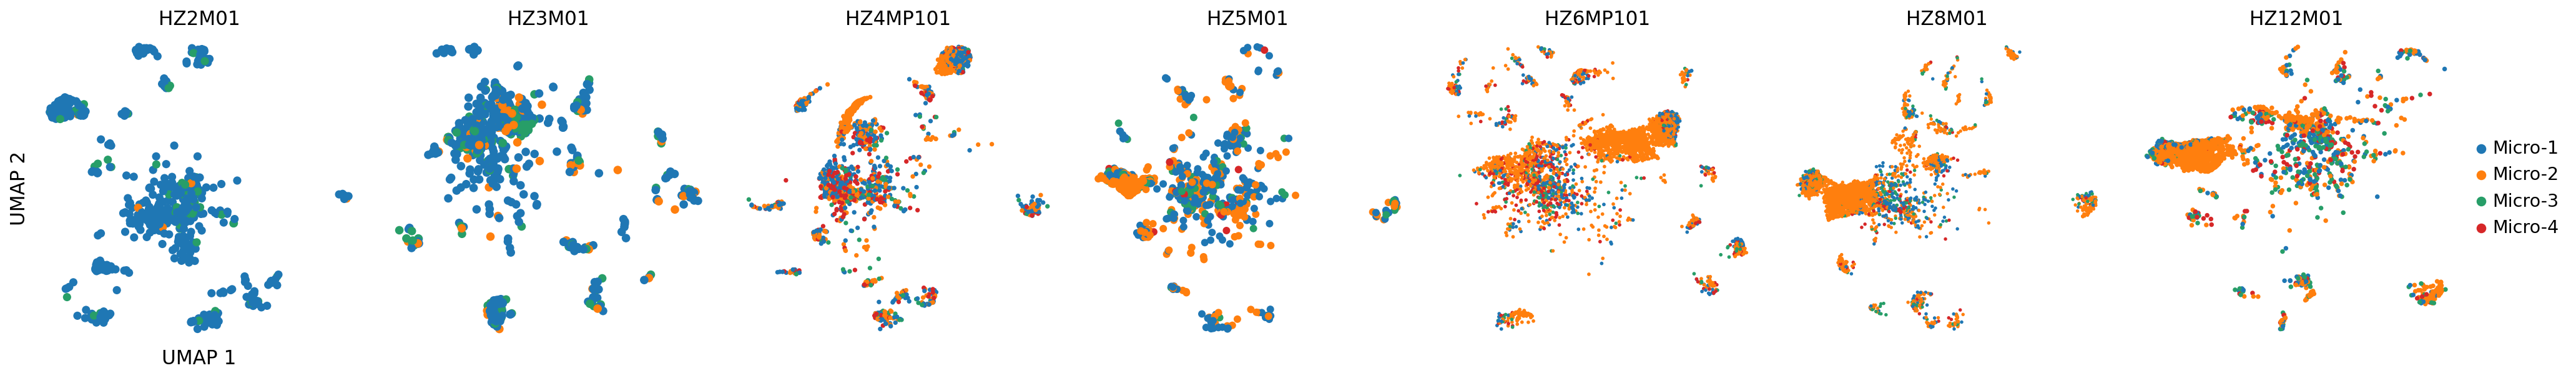

In [142]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

# Determine the number of subplots needed
num_plots = len(slide)
num_rows = 1
num_cols = 7

# Create a 1x7 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(26, 4), gridspec_kw={'width_ratios': [1] * num_cols})
axes = axes.flatten()  # Flatten the 1x7 array to easily iterate through it

# Rearrange the slide items to start with the second key and put the first key last
slide_items = list(slide.items())
slide_items = slide_items[1:] + slide_items[:1]

# Plot each adata in the appropriate subplot
for i, (key, adata) in enumerate(slide_items):
    mask = adata.obs["celltype"] == "Micro"
    # Plot the normalized values
    adata_plot = adata[mask].copy()
    np.random.seed(0)
    random_indices = np.random.permutation(list(range(adata_plot.shape[0]))) # shuffle the cells
    adata_plot = adata_plot[random_indices, :].copy()
    sc.pl.umap(adata_plot, color="fine", ax=axes[i], show=False)
    axes[i].set_title(key.split(sep = "_")[0])
    for pos in ['right', 'top', 'bottom', 'left']: 
        axes[i].spines[pos].set_visible(False)
    
    # Only set the x and y labels for the lower-left corner plot
    if i == 0:
        axes[i].set_xlabel("UMAP 1")
        axes[i].set_ylabel("UMAP 2")
    else:
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    # Only add a legend to the last subplot (the rightmost one)
    if i != len(slide_items) - 1:  # Check if it’s the last plot
        axes[i].legend().set_visible(False)

plt.tight_layout()  # Adjust layout to make space for the color bar
plt.show()


/tmp/ipykernel_253085/2223568190.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the color bar


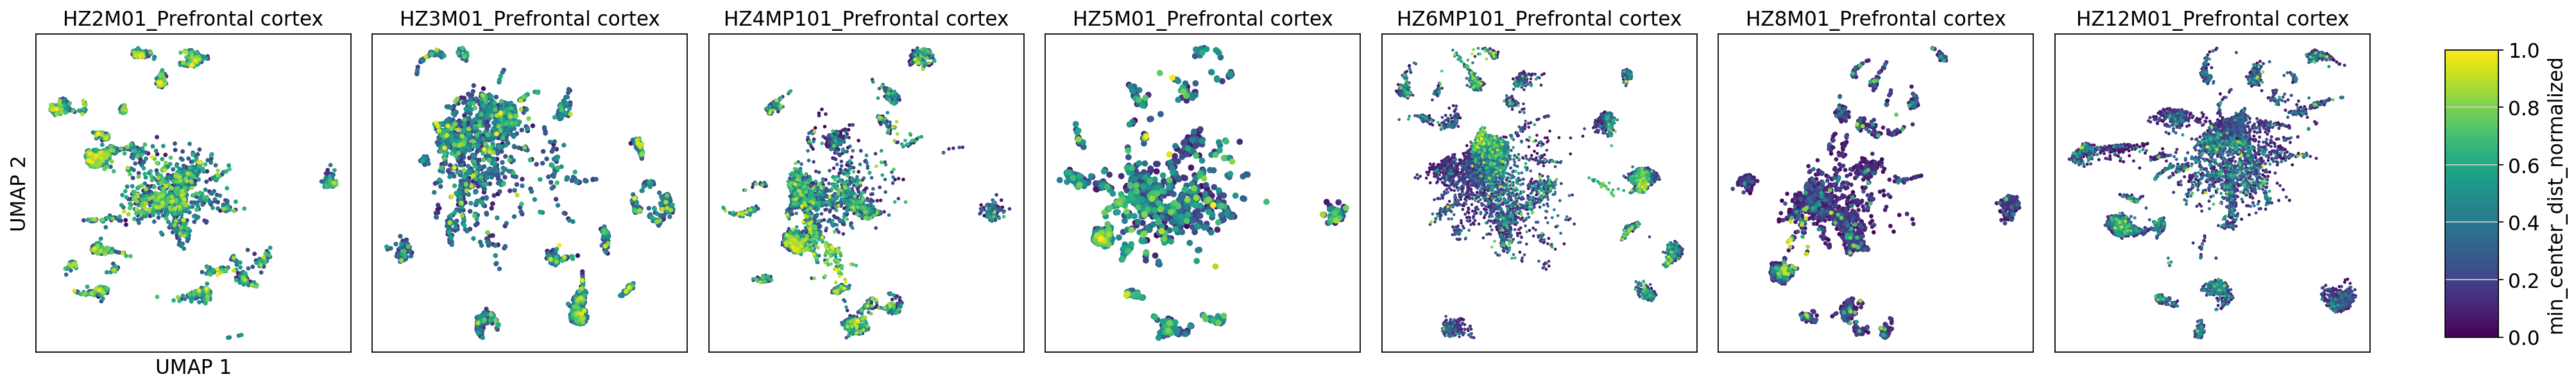

In [119]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

# Determine the number of subplots needed
num_plots = len(slide)
num_rows = 1
num_cols = 7

# Create a 1x7 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(26, 4), gridspec_kw={'width_ratios': [1] * num_cols})
axes = axes.flatten()  # Flatten the 1x7 array to easily iterate through it

# Function to normalize values between 0 and 1
def normalize(values):
    min_val = values.min()
    max_val = values.max()
    return (values - min_val) / (max_val - min_val)

# Rearrange the slide items to start with the second key and put the first key last
slide_items = list(slide.items())
slide_items = slide_items[1:] + slide_items[:1]

# Plot each adata in the appropriate subplot
for i, (key, adata) in enumerate(slide_items):
    mask = adata.obs["celltype"] == "Astro"
    # Normalize the min_center_dist values for this adata object
    adata.obs.loc[mask, "min_center_dist_normalized"] = normalize(adata.obs.loc[mask, "min_center_dist"])
    # Plot the normalized values
    sc.pl.umap(adata[mask], color="min_center_dist_normalized", vmin=0, vmax=1, ax=axes[i], show=False, colorbar_loc = None)
    axes[i].set_title(key)
    # Only set the x and y labels for the lower-left corner plot
    if i == 0:
        axes[i].set_xlabel("UMAP 1")
        axes[i].set_ylabel("UMAP 2")
    else:
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

# Add an axis for the color bar on the right border
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('min_center_dist_normalized')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the color bar
plt.show()


# Regress out same region in the same month

In [48]:
cellpaths = cm.list_files_matching_criteria(dir_path, "5M", separator = ".")

In [49]:
cellpaths

{'HZ12M01_Basal forebrain': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Basal forebrain.h5ad',
 'HZ12M01_Hippocampal formation': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Hippocampal formation.h5ad',
 'HZ12M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Prefrontal cortex.h5ad',
 'HZ12M01_Striatum': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Striatum.h5ad',
 'HZ2M01_Basal forebrain': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Basal forebrain.h5ad',
 'HZ2M01_Hippocampal formation': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Hippocampal formation.h5ad',
 'HZ2M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Prefrontal cortex.h5ad',
 'HZ2M01_Striatum': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bi

In [104]:
cellbins = cm.load_data_in_parallel(cellpaths, sc.read_h5ad)

# Regress out the difference between samples (Wrong But use for Comparison)

In [81]:
slide = []
for key, adata in cellbins.items():
    if "Prefrontal cortex" in key:
        print(key)
        slide.append(adata)

HZ12M01_Prefrontal cortex
HZ2M01_Prefrontal cortex
HZ3M01_Prefrontal cortex
HZ4MP101_Prefrontal cortex
HZ5M01_Prefrontal cortex
HZ6MP101_Prefrontal cortex
HZ8M01_Prefrontal cortex


In [82]:
slide

[AnnData object with n_obs × n_vars = 37909 × 895
     obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0

In [83]:
adata_combined = ad.concat(slide)

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [86]:
adata_combined

AnnData object with n_obs × n_vars = 315755 × 166
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.

In [85]:
adata_combined.obs["sample"].unique()

['HZ12M_1', 'HZ2M_1', 'HZ3M_1', 'HZ4M_4', 'HZ5M_1', 'HZ6M_4', 'HZ8M_1']
Categories (7, object): ['HZ2M_1', 'HZ3M_1', 'HZ4M_4', 'HZ5M_1', 'HZ6M_4', 'HZ8M_1', 'HZ12M_1']

In [87]:
# Perform harmony integration
sc.tl.pca(adata_combined, svd_solver='arpack')

sc.external.pp.harmony_integrate(adata_combined, key="sample")

# Compute neighbors using the harmony-integrated PCA representation
sc.pp.neighbors(adata_combined, use_rep="X_pca_harmony")

# Compute UMAP
sc.tl.umap(adata_combined)

# Update UMAP coordinates to use the harmony-integrated ones
adata_combined.obsm["X_umap_harmony_sample"] = adata_combined.obsm["X_umap"]

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=50
    finished (0:00:17)


2024-05-20 19:52:16,422 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-20 19:54:42,067 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-20 19:54:47,163 - harmonypy - INFO - Iteration 1 of 10
2024-05-20 20:02:44,110 - harmonypy - INFO - Iteration 2 of 10
2024-05-20 20:11:22,069 - harmonypy - INFO - Iteration 3 of 10
2024-05-20 20:15:15,408 - harmonypy - INFO - Iteration 4 of 10
2024-05-20 20:18:23,927 - harmonypy - INFO - Converged after 4 iterations


computing neighbors


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:04:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:19:09)


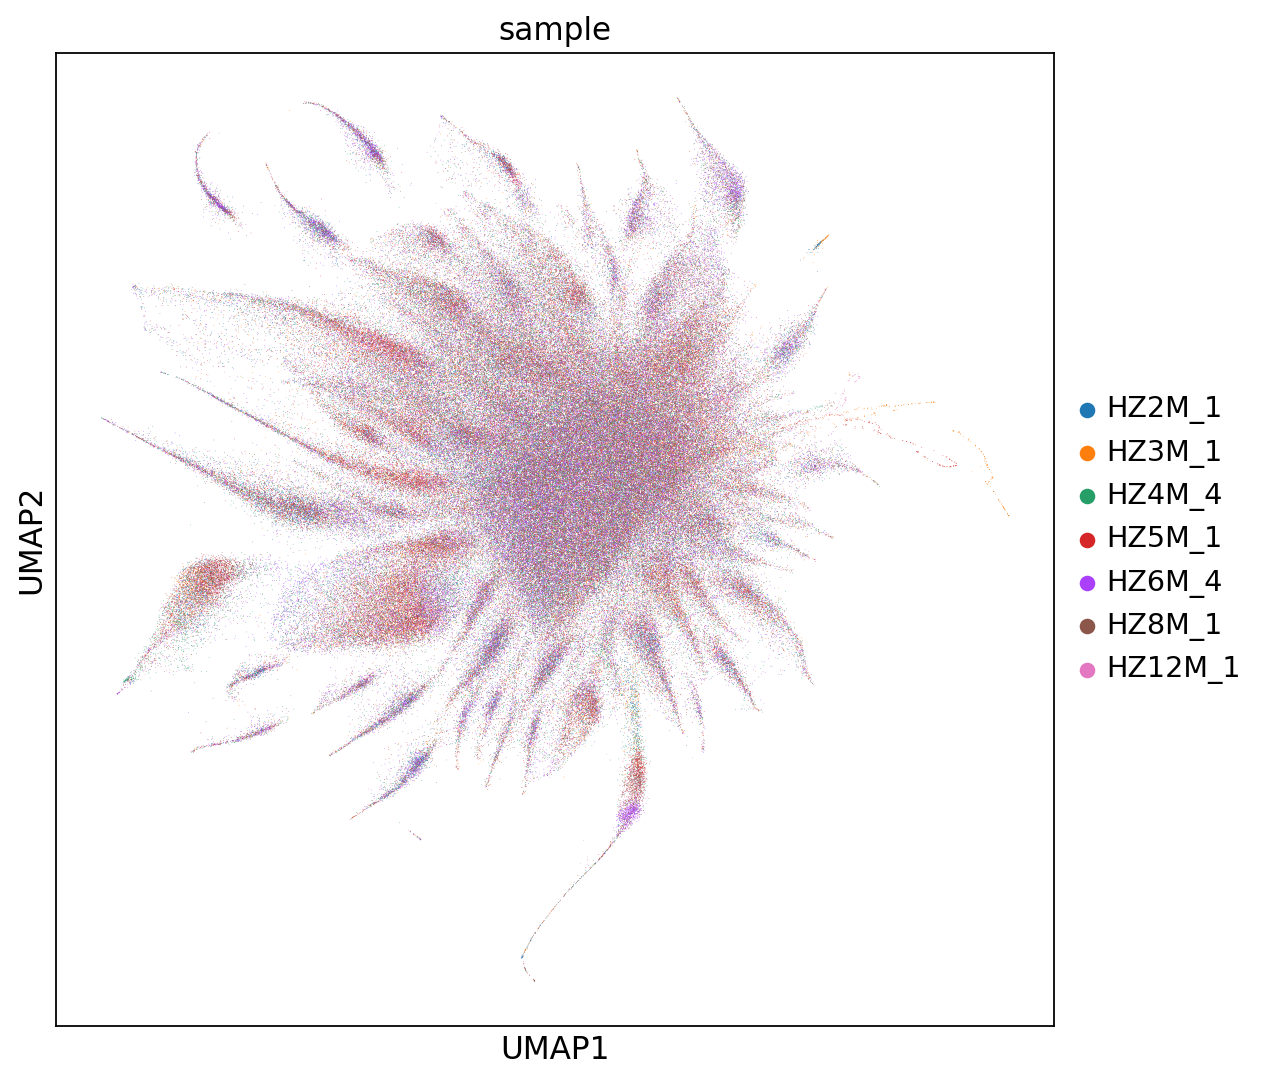

In [88]:
sc.pl.umap(adata_combined, color = "sample")

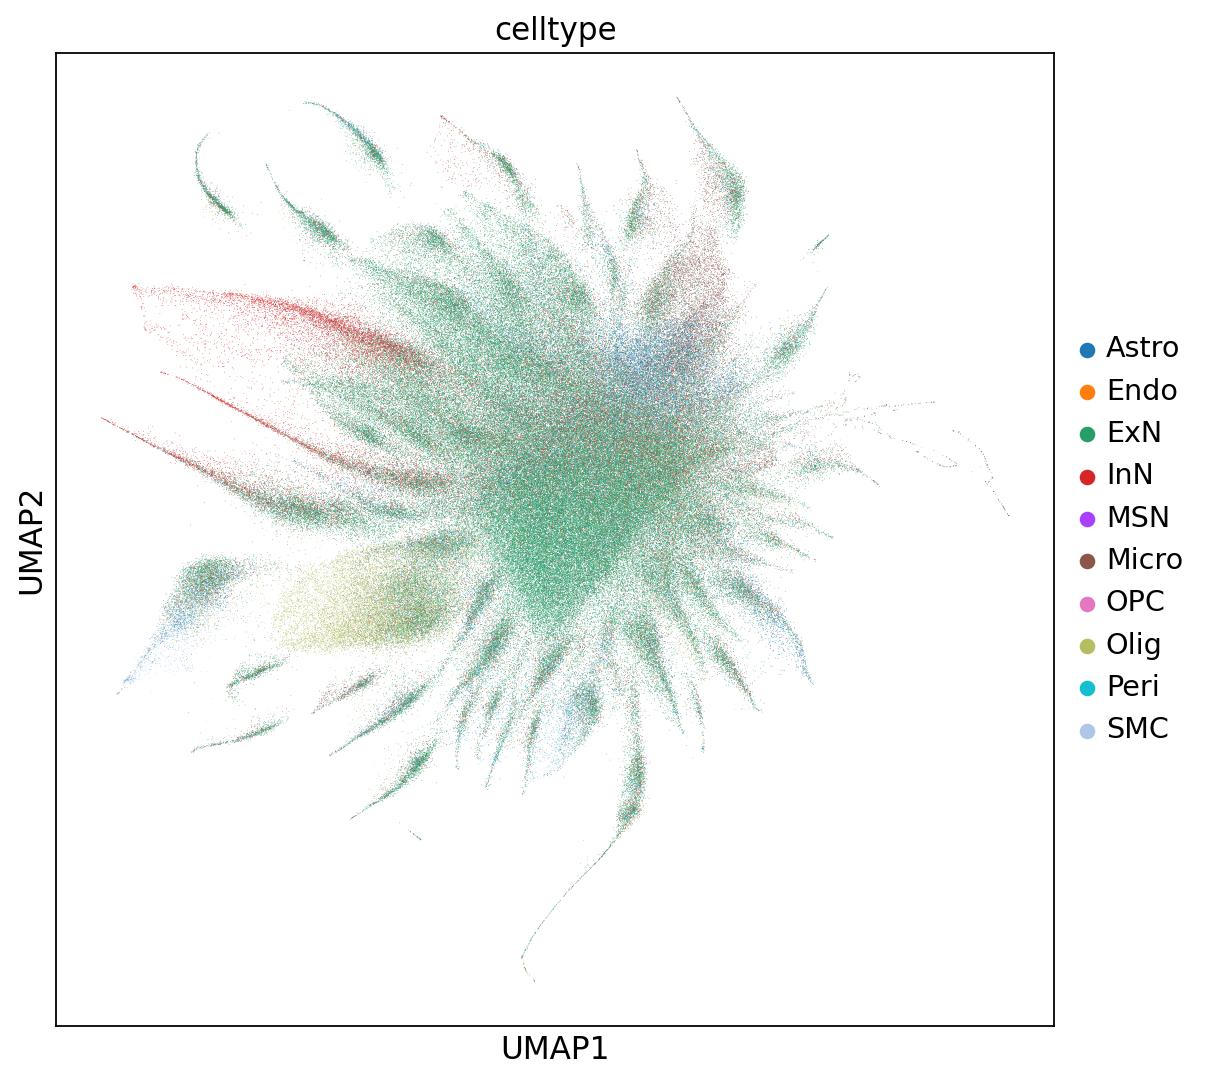

In [89]:
sc.pl.umap(adata_combined, color = "celltype")

# Corrected (Using Harmonized PCA)

In [90]:
correct = ad.concat(slide)

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [92]:
correct

AnnData object with n_obs × n_vars = 315755 × 166
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.

In [93]:
sc.external.pp.harmony_integrate(correct, key="sample", basis = "X_pca_harmony", adjusted_basis="X_pca_harmony_2")

# Compute neighbors using the harmony-integrated PCA representation
sc.pp.neighbors(correct, use_rep="X_pca_harmony_2")

# Compute UMAP
sc.tl.umap(correct)

# Update UMAP coordinates to use the harmony-integrated ones
correct.obsm["X_umap_harmony_sample"] = correct.obsm["X_umap"]

2024-05-20 22:58:08,165 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-20 23:00:09,906 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-20 23:00:16,254 - harmonypy - INFO - Iteration 1 of 10
2024-05-20 23:08:48,650 - harmonypy - INFO - Iteration 2 of 10
2024-05-20 23:16:31,454 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:19:29)


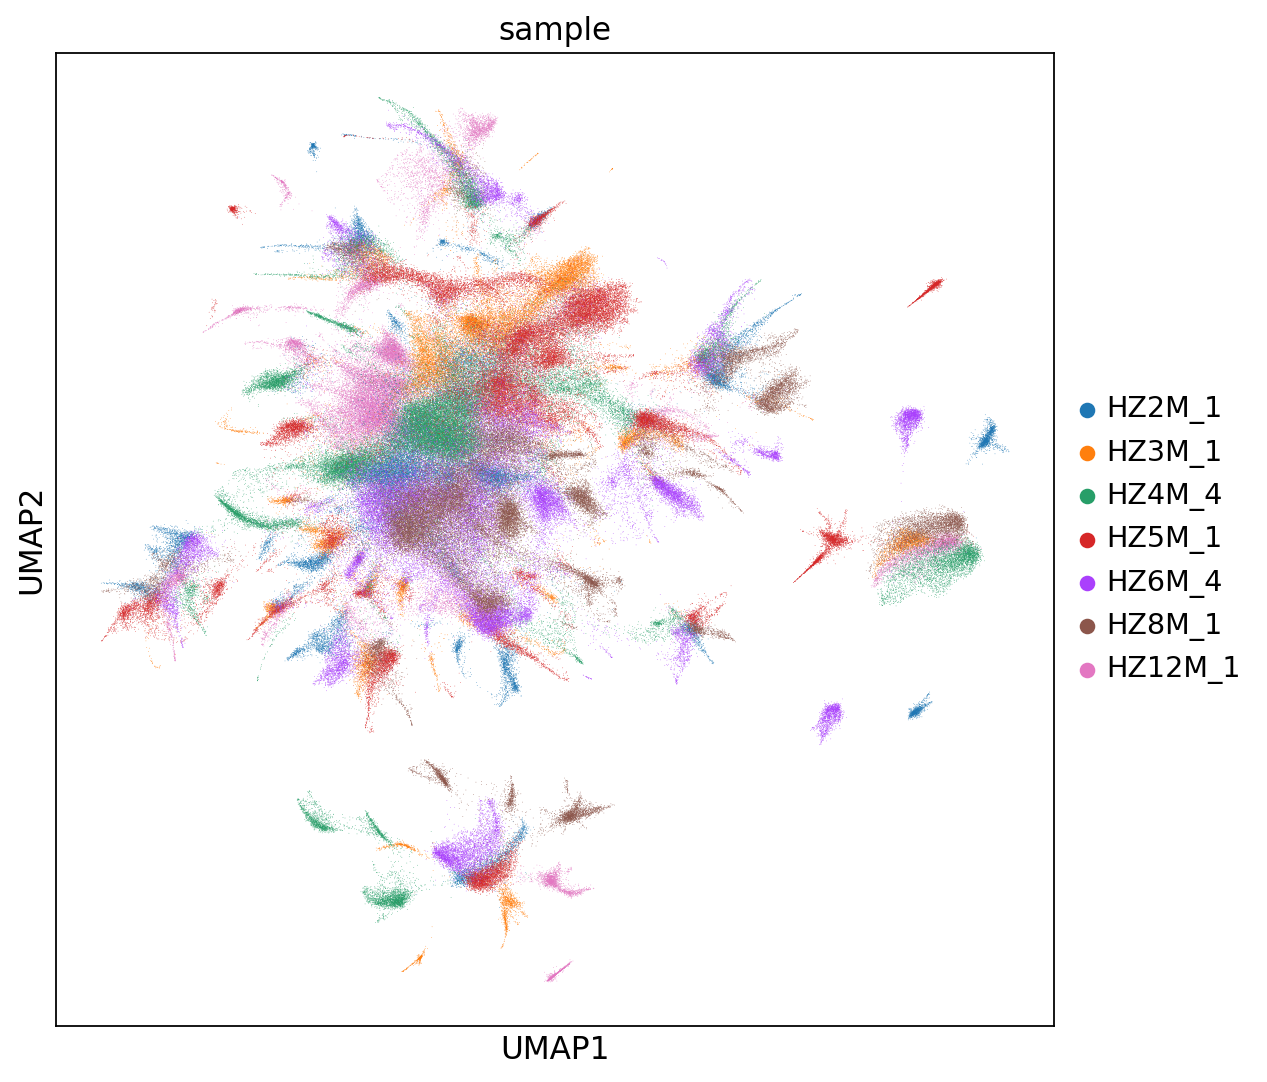

In [94]:
sc.pl.umap(correct, color = "sample")

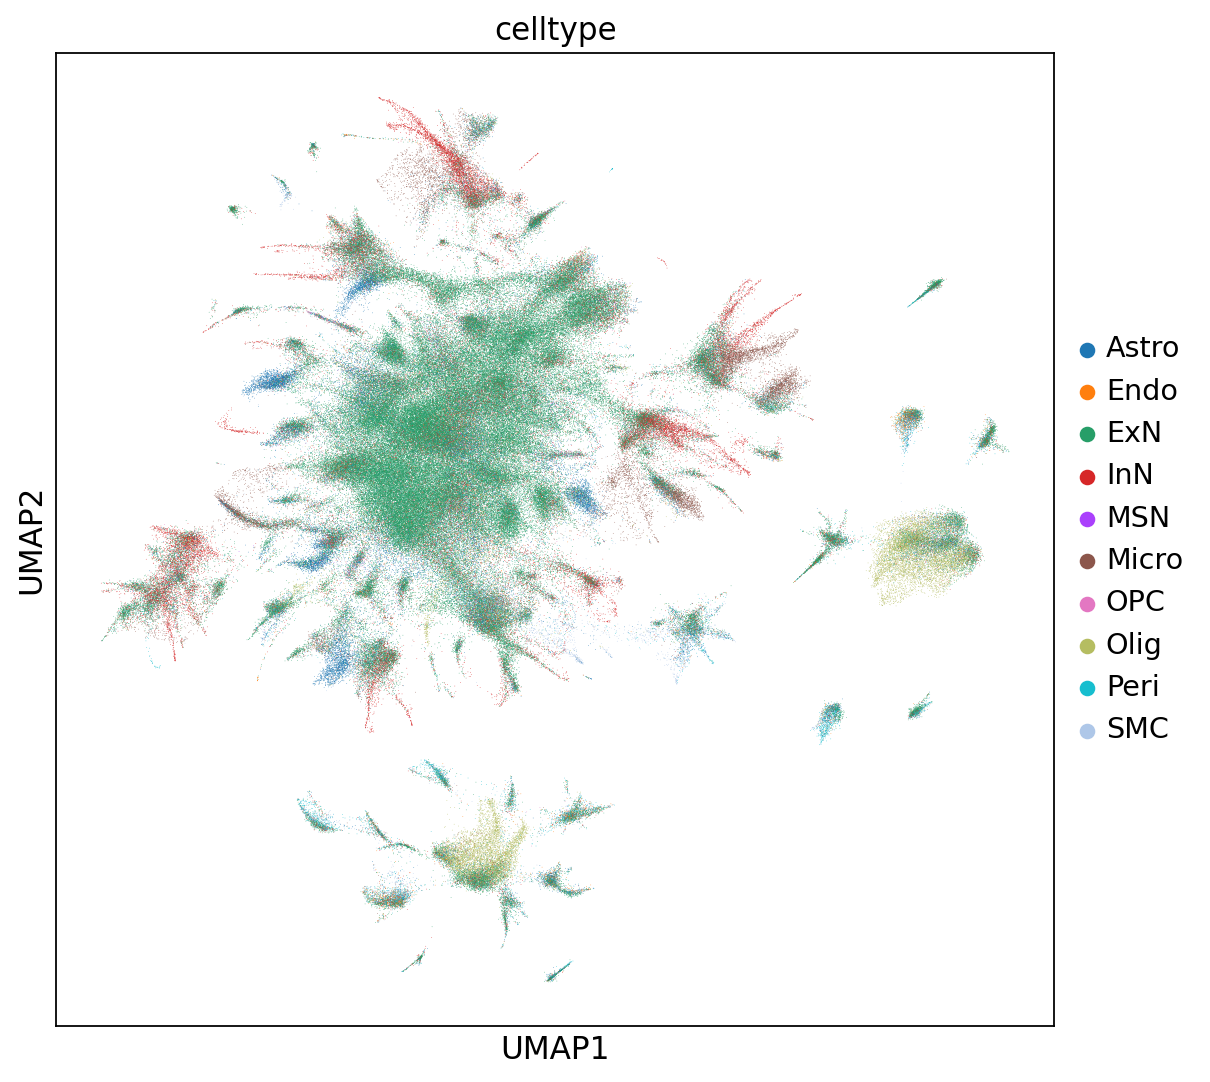

In [95]:
sc.pl.umap(correct, color = "celltype")